In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from datetime import datetime,timedelta

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
from sqlalchemy import create_engine, inspect, func
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

In [16]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [18]:
# # Station Analysis

# Calculate the date 1 year ago from today
#print(dt.date.today())
year_ago = dt.date.today() - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores

year = session.query(Measurement.date,Measurement.prcp).filter(
        Measurement.date > year_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

DF_1 = pd.DataFrame(year)

print(DF_1.columns.values)
DF_1.head()

#DF_1 = DF_1.set_index('date')



['date' 'prcp']


,date,prcp
0,2017-08-11,0.0
1,2017-08-11,0.0
2,2017-08-11,0.0
3,2017-08-11,NaN
4,2017-08-12,0.0


In [19]:
#DF_1=pd.to_datetime(DF_1['date'],format='%YYYY-%dd-%mm',errors='ignore')
#DF_1.sort_values('date')

#print(DF_1.dtypes)
#DF_1.head()


<IPython.core.display.Javascript object>


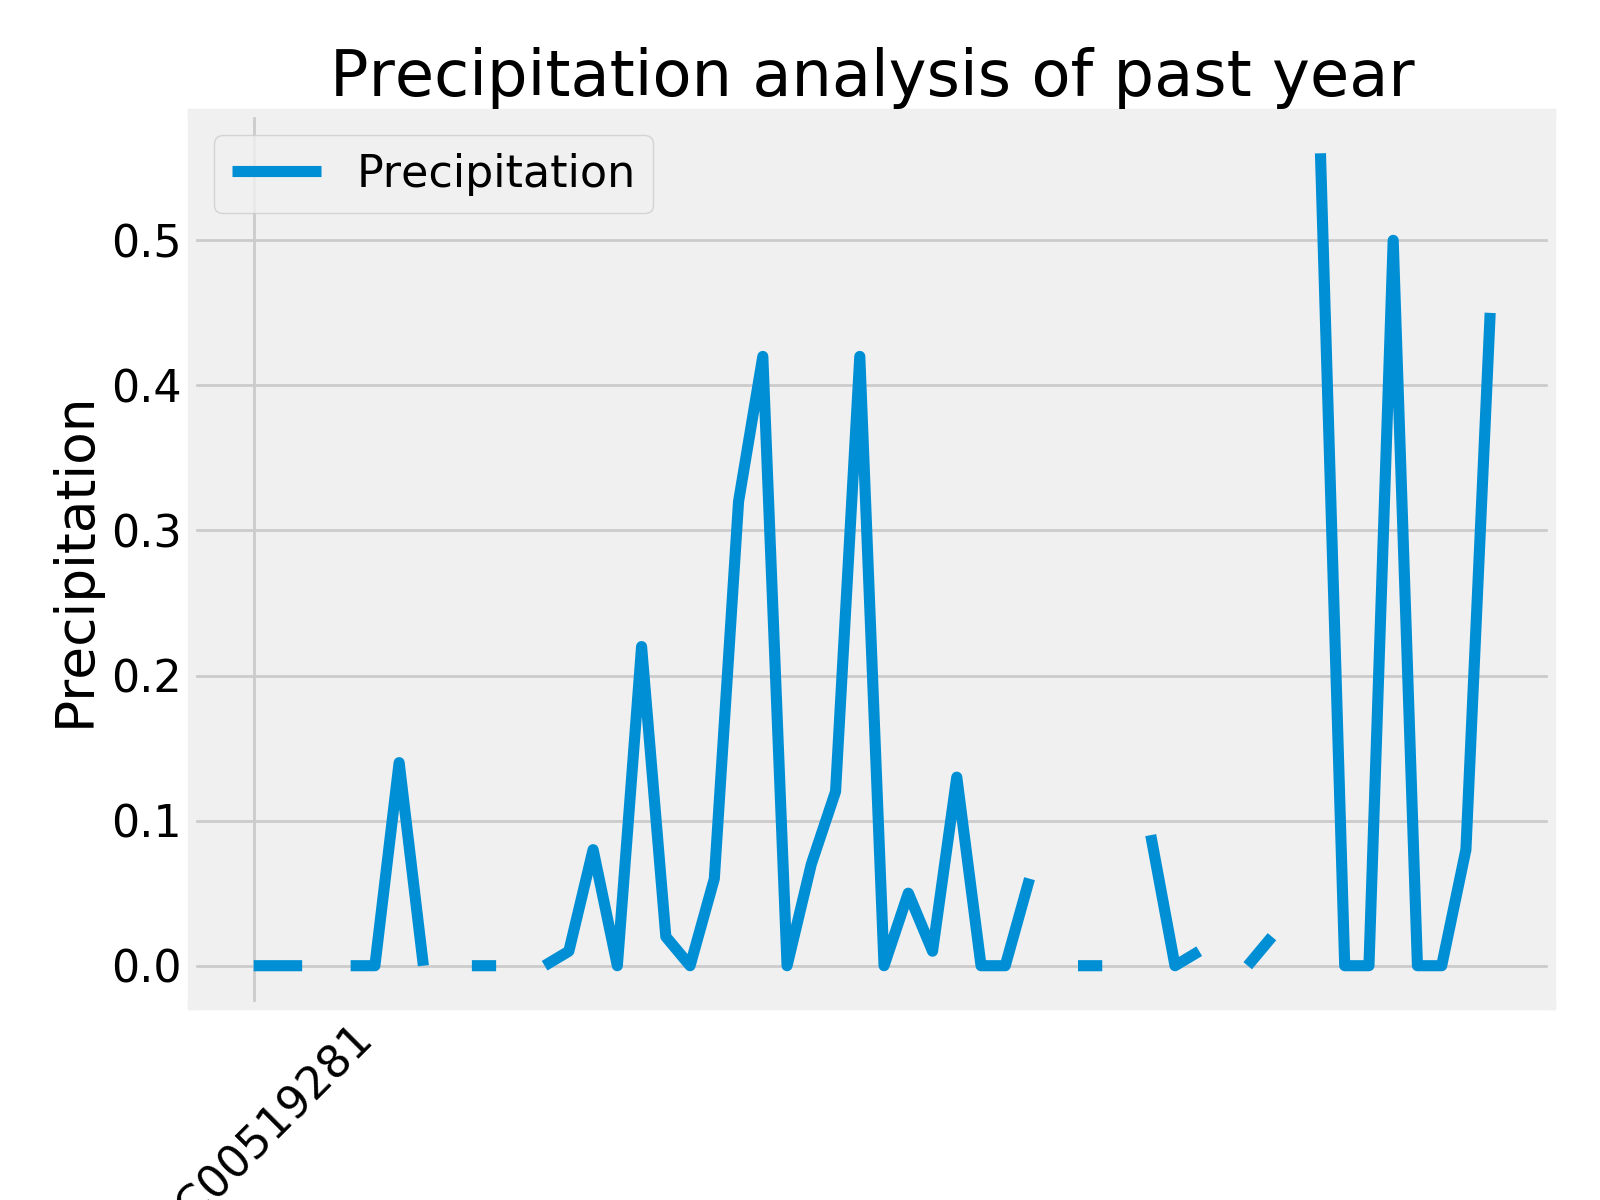

In [38]:
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
DF_1.plot(kind="line",linewidth=4,figsize=(8,6))

plt.style.use('fivethirtyeight')

matplotlib.rcParams.update({'font.size': 16})

plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title(f"Precipitation analysis of past year")
plt.xticks(rotation=45)
plt.legend(["Precipitation"])
plt.tight_layout()

plt.show()

# Rotate the xticks for the dates

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [22]:
# How many stations are available in this dataset?
#Stations = session.query(Station.station.distinct().count()


total_stations = session.query(Station.station).distinct().count()
print(f"Total number of stations: {total_stations}")



Total number of stations: 9


In [23]:
# What are the most active stations?


session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()


# List the stations and the counts in descending order.




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
session.query(Measurement.id, func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()



[(13294, 54.0)]

In [25]:
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.id, func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(14261, 85.0)]

In [26]:
# Choose the station with the highest number of temperature observations.
year_2 = session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(
        Measurement.date > year_ago).order_by(Measurement.date).filter(Measurement.station == 'USC00519281').all()
year_2

[('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-18', 79.0)]

In [40]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
DF_2 = pd.DataFrame(year_2)
DF_2

,station,date,tobs
0,USC00519281,2017-08-13,77.0
1,USC00519281,2017-08-14,77.0
2,USC00519281,2017-08-15,77.0
3,USC00519281,2017-08-16,76.0
4,USC00519281,2017-08-17,76.0
5,USC00519281,2017-08-18,79.0


In [42]:
DF_3 = DF_2[['tobs', 'station', 'date']]
DF_3

,tobs,station,date
0,77.0,USC00519281,2017-08-13
1,77.0,USC00519281,2017-08-14
2,77.0,USC00519281,2017-08-15
3,76.0,USC00519281,2017-08-16
4,76.0,USC00519281,2017-08-17
5,79.0,USC00519281,2017-08-18


<IPython.core.display.Javascript object>


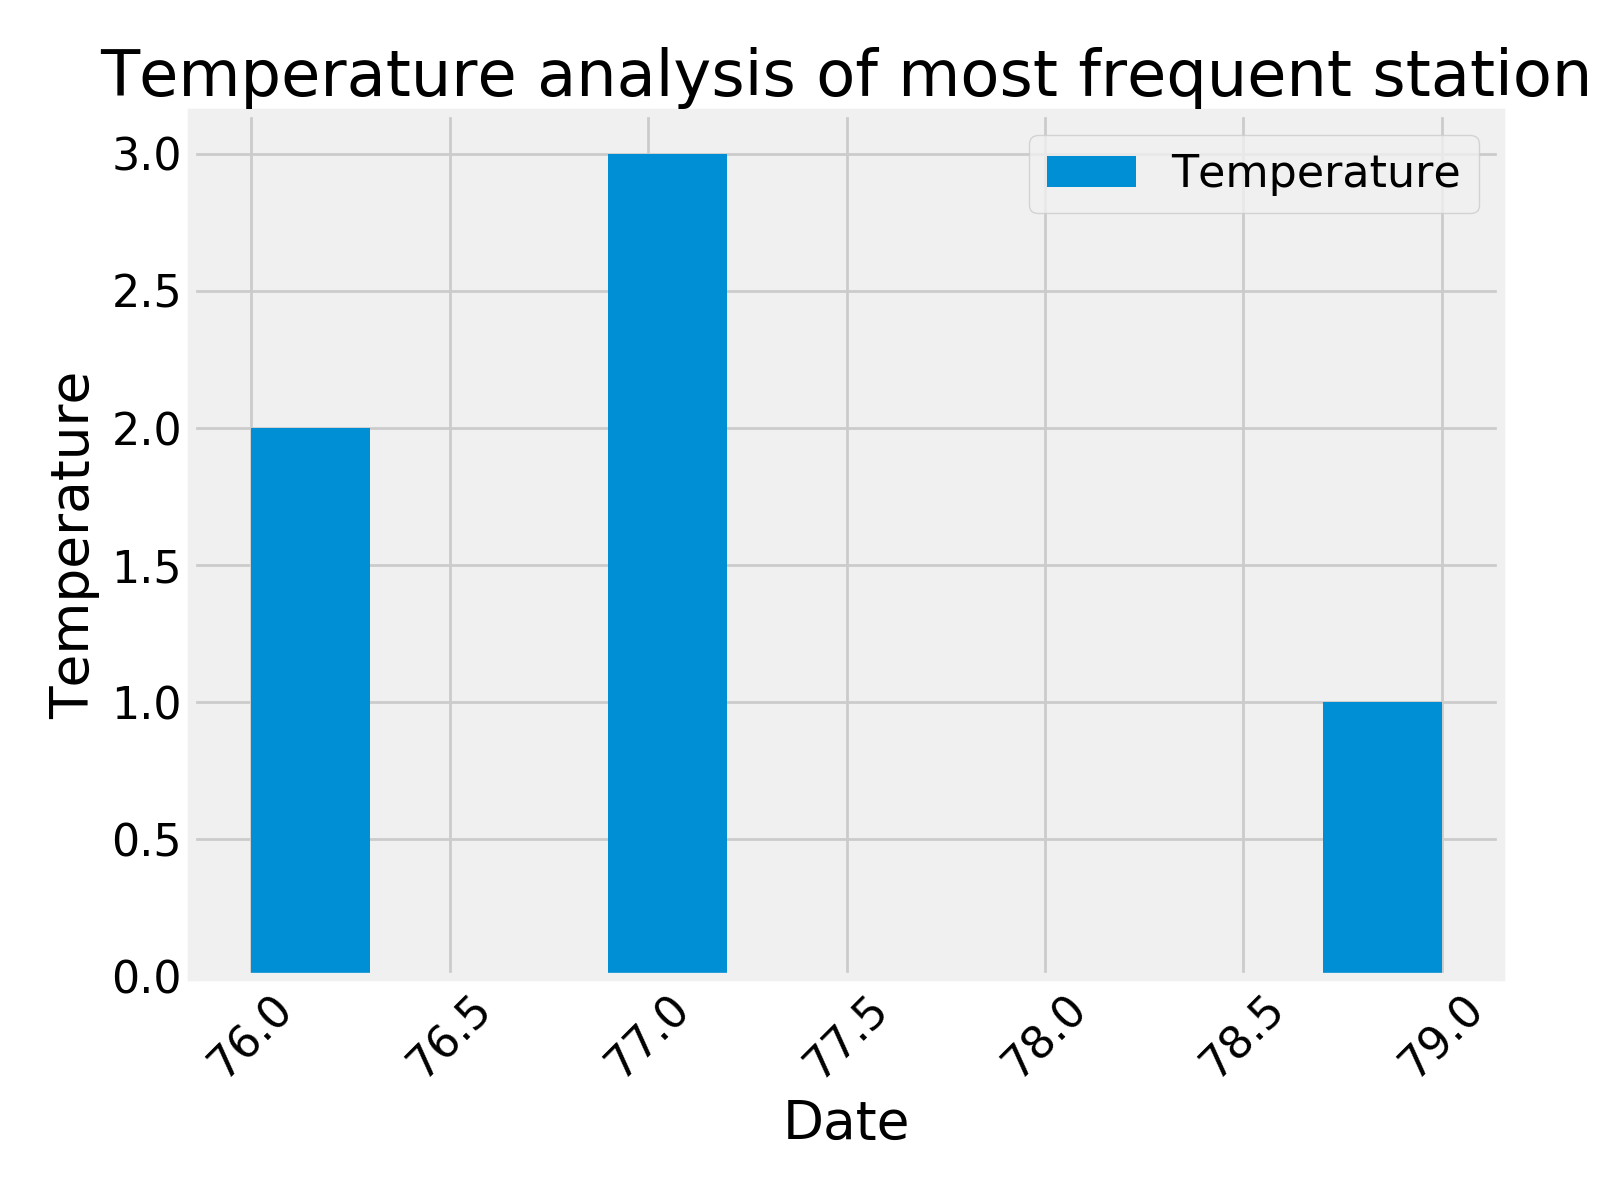

In [67]:
DF_3.plot(kind="hist",linewidth=4,figsize=(8,6))

x= DF_3['station']
y= DF_3['tobs']

#plt.hist(x, y)


plt.style.use('fivethirtyeight')

matplotlib.rcParams.update({'font.size': 16})

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title(f"Temperature analysis of most frequent station")
plt.xticks(rotation=45)
plt.legend(["Temperature"])
plt.tight_layout()


plt.show()

In [29]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 

# for your trip using the previous year's data for those same dates.


In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [32]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [36]:
# Plot the daily normals as an area plot with `stacked=False`
# 
tobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > year_ago).order_by(Measurement.date).all()

tobs_date = set([i[0] for i in tobs])

tobs_all={}
for i in tobs_date:
   vals=[]
   for j in range(len(tobs)):
       if tobs[j][0] == i:
           temp=tobs[j][1]
           vals.append(temp)
   tobs_all[i]=vals

tobs_all


{'2017-08-11': [78.0, 81.0, 81.0, 72.0],
 '2017-08-12': [80.0, 83.0, 74.0],
 '2017-08-13': [81.0, 81.0, 84.0, 77.0, 80.0],
 '2017-08-14': [79.0, 81.0, 75.0, 77.0, 79.0],
 '2017-08-15': [78.0, 82.0, 79.0, 77.0, 70.0],
 '2017-08-16': [82.0, 79.0, 76.0, 71.0],
 '2017-08-17': [78.0, 83.0, 76.0, 72.0],
 '2017-08-18': [80.0, 77.0, 79.0, 76.0],
 '2017-08-19': [79.0, 80.0, 85.0, 71.0],
 '2017-08-20': [81.0, 80.0, 78.0],
 '2017-08-21': [81.0, 79.0, 82.0, 76.0],
 '2017-08-22': [82.0, 82.0, 76.0],
 '2017-08-23': [81.0, 82.0, 82.0, 76.0]}

In [37]:
# 
prcp=session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > '2016-08-23' ).order_by(Measurements.date).all()
prcp_date = set([i[0] for i in prcp])

prcp_all={}
for i in prcp_date:
   vals=[]
   for j in range(len(prcp)):
       if prcp[j][0] == i:
           temp=prcp[j][1]
           vals.append(temp)
   prcp_all[i]=vals

NameError: name 'Measurements' is not defined

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
   """Return the test data as json"""
   return jsonify(prcp_all)

In [ ]:
results = session.query(Passenger.name).all()

    # Convert list of tuples into normal list
    all_names = list(np.ravel(results))

    return jsonify(all_names)

In [ ]:
stats = session.query(Measurement.station, Measurement.id).all()

#all_names = list(np.ravel(stats))
#return jsonify(all_names)

stats

In [ ]:
#http://codeandlife.com/2014/12/07/sqlalchemy-results-to-json-the-easy-way/

def example():
    res = conn.execute(select([stats]))

# return all rows as a JSON array of objects
    return json.dumps([dict(r) for r in res])



